<h1 align="center">Classification of Mails: Spam,Normal</h1>


Dataset used in this project is available on the My repo 


* It consists of 5728 different emails spread over 2 classes. Of the 5728 examples, 4360 are of "normal" mails. While the other 1368 are "spam" .


* We are going to use the `CountVectorizer` to convert the text data into a matrix of token counts. We will use the `MultinomialNB` classifier to train the model.
* We will use the `train_test_split` function to split the data into training and testing sets.
* We will use the `confusion_matrix` and `classification_report` to evaluate the model.
* We will use the `pipeline` to chain the vectorizer and the classifier together.
* Our goal is to build a model that can classify an email as spam or not spam. We will use the 80% of the data for training and the rest 20% for testing.

<h3 > Import Libraries </h3>



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h3> 1. Load the Data </h3>

In [36]:
mails_df= pd.read_csv('emails.csv')
mails_df.head(5)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
mails_df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<h4> 2. Disocvering the data and missing values</h4>

In [8]:
# check for null values or missing values
mails_df.isnull().sum()
# check for NaN values
mails_df.isna().sum()
# count the duplicate rows
mails_df.duplicated().sum()

0

In [37]:
# Split the Data into two parts: spam and normal
spamMails = mails_df[mails_df['spam'] == 1]
hamMails = mails_df[mails_df['spam'] == 0]

In [38]:
ham_count = len(mails_df[mails_df['spam'] == 0])
spam_count = len(mails_df[mails_df['spam'] == 1])
ham_percent = (ham_count/len(mails_df))*100
spam_percent = (spam_count/len(mails_df))*100

In [50]:
# clean the data from stop words and punctuations
import nltk
import string
nltk.download('stopwords')
import re
def cleanData(data):
    stop_words = set(stopwords.words('english'))
    data = data.lower()
    data = re.sub(r'\d+', '', data)
    data = data.translate(str.maketrans('', '', string.punctuation))
    data = data.split()
    data = [word for word in data if word not in stop_words]
    data = ' '.join(data)
    return data
mails_df['text'] = mails_df['text'].apply(cleanData)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amraly/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h4> 3. Data Visualization </h4>

In [51]:
# Data for plotting
categories = ['Ham', 'Spam']
counts = [ham_count, spam_count]
percentages = [ham_percent, spam_percent]

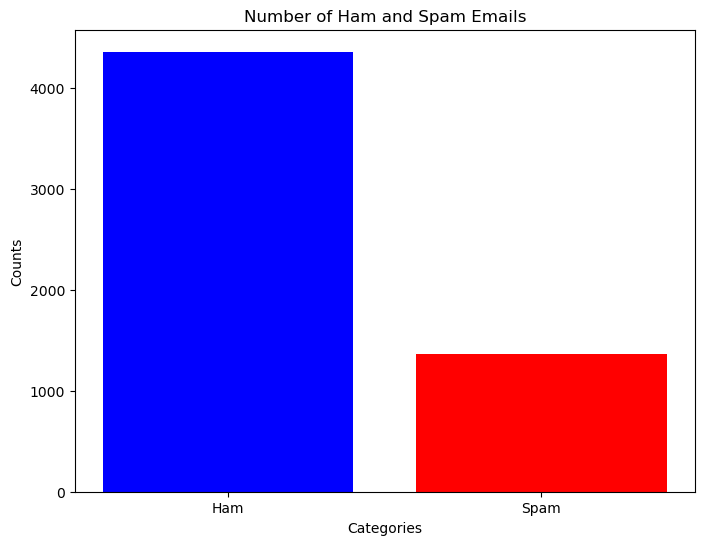

In [52]:
# Bar plot for counts
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Number of Ham and Spam Emails')
plt.show()


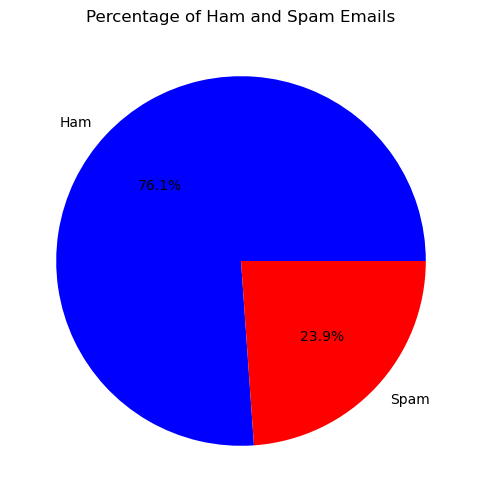

In [53]:
# Pie chart for percentages
plt.figure(figsize=(8, 6))
plt.pie(percentages, labels=categories, autopct='%1.1f%%', colors=['blue', 'red'])
plt.title('Percentage of Ham and Spam Emails')
plt.show()

<h3> 3. Apply the model to classify the mails as spam or ham </h3>

In [54]:
# use TF-IDF to classify spam mails
from sklearn.feature_extraction.text import TfidfVectorizer
X = TfidfVectorizer().fit_transform(mails_df['text'])
X.shape

(5728, 33572)

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
spam_vectorizer = CountVectorizer()
spam_vectorized = spam_vectorizer.fit_transform(mails_df['text'])
spam_vectorized.shape

(5728, 33572)

<h4> Split the data into training and testing sets </h4>


In [56]:
from sklearn.model_selection import train_test_split

label = mails_df['spam']
X_count = spam_vectorized
y = label

In [57]:
from sklearn.model_selection import train_test_split
X_count_train , X_count_test , y_count_train , y_count_test = train_test_split(X_count,y,test_size=0.2,random_state=42)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)

<h3> 4. Evaluate the Model </h3>

In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from scipy.sparse import vstack


naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_count_train, y_train)
y_pred = naive_bayes_classifier.fit(X_train, y_train).predict(X_test)
y_count_pred = naive_bayes_classifier.predict(X_count_test)

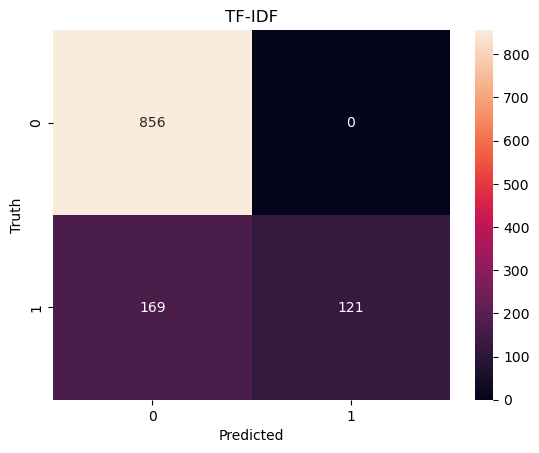

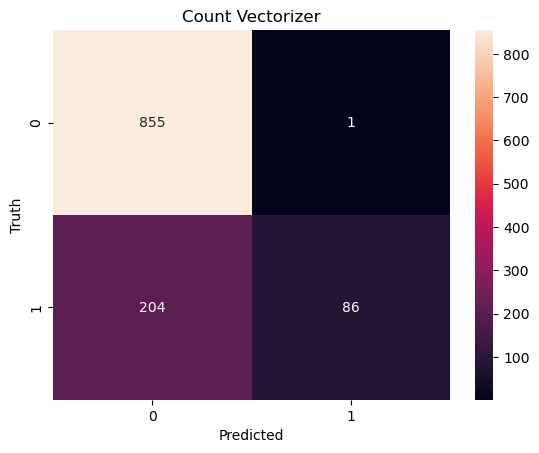

In [58]:
# compare between the countvectorizer and tfidfvectorizer
from sklearn.metrics import confusion_matrix, classification_report
cm1 = confusion_matrix(y_test, y_pred)
cm2 = confusion_matrix(y_count_test, y_count_pred)
sns.heatmap(cm1, annot=True, fmt='d')
plt.title('TF-IDF')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()
sns.heatmap(cm2, annot=True, fmt='d')
plt.title('Count Vectorizer')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [61]:
# use classification report to compare models

from sklearn.metrics import classification_report
# plot the classification report for the model
print(classification_report(y_test, y_pred, target_names=['spam', 'ham']))
print(classification_report(y_count_test, y_count_pred, target_names=['spam', 'ham']))

              precision    recall  f1-score   support

        spam       0.84      1.00      0.91       856
         ham       1.00      0.42      0.59       290

    accuracy                           0.85      1146
   macro avg       0.92      0.71      0.75      1146
weighted avg       0.88      0.85      0.83      1146

              precision    recall  f1-score   support

        spam       0.81      1.00      0.89       856
         ham       0.99      0.30      0.46       290

    accuracy                           0.82      1146
   macro avg       0.90      0.65      0.67      1146
weighted avg       0.85      0.82      0.78      1146

